## Análisis de datos - Clase 6

### Taller práctico - análisis completo de un dataset

### Visualizaciones

En esta clase vamos a analizar en forma completa un dataset con datos de Fórmula 1 de la temporada 2024 (los datos fueron extraídos con la biblioteca Fastf1). El dataset contiene información sobre las carreras, los pilotos, los tiempos y los resultados de cada evento.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Importamos los datasets

In [2]:
import json

# Leer el JSON
with open("../datasets/carreras_24_dtypes.json", "r") as f:
    info = json.load(f)

dtypes_str = info["dtypes"]
categorical_cols = info["categoricals"]

# Detectar columnas especiales
parse_dates = [col for col, dtype in dtypes_str.items() if "datetime" in dtype]
timedeltas = [col for col, dtype in dtypes_str.items() if "timedelta" in dtype]

# Convertir strings de tipo a los tipos correctos
def convertir_dtype(dtype_str):
    if dtype_str.startswith("int"): return "Int64"
    if dtype_str.startswith("float"): return "float"
    if dtype_str == "object": return "string"
    if dtype_str == "bool": return "boolean"
    return "string"

normal_dtypes = {col: convertir_dtype(dtype) for col, dtype in dtypes_str.items()
                 if col not in parse_dates + timedeltas + categorical_cols}


# leer CSV
carreras_24 = pd.read_csv("../datasets/carreras_24.csv", parse_dates=parse_dates, dtype=normal_dtypes)


# Restaurar timedelta
for col in timedeltas:
    carreras_24[col] = pd.to_timedelta(carreras_24[col])

# Restaurar categoricals
for col in categorical_cols:
    carreras_24[col] = carreras_24[col].astype("category")


carreras_24.head()

,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,TrackTemp,Humidity,PitOutTime2,PitTime,PitTime_seconds,Pit,LapNumber_driver,DNF,Likely_DNF,Winner
0,ALB,23,101.190,1,1.0,NaT,NaT,17.981,40.443,35.860,...,32.1,49.0,NaT,NaT,0.0,0,57,True,False,NOR
1,ALB,23,120.191,2,1.0,NaT,NaT,18.394,56.603,45.194,...,32.2,49.0,NaT,NaT,0.0,0,57,True,False,NOR
2,ALB,23,95.776,3,1.0,NaT,NaT,19.929,42.240,33.607,...,31.8,49.0,NaT,NaT,0.0,0,57,True,False,NOR
3,ALB,23,90.060,4,1.0,NaT,NaT,18.099,37.915,34.046,...,31.8,49.0,NaT,NaT,0.0,0,57,True,False,NOR
4,ALB,23,90.369,5,1.0,NaT,NaT,18.232,37.968,34.169,...,31.7,50.0,NaT,NaT,0.0,0,57,True,False,NOR


In [3]:
carreras_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26577 entries, 0 to 26576
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   Driver            26577 non-null  category       
 1   DriverNumber      26577 non-null  category       
 2   LapTime           26577 non-null  float64        
 3   LapNumber         26577 non-null  Int64          
 4   Stint             26577 non-null  category       
 5   PitOutTime        840 non-null    timedelta64[ns]
 6   PitInTime         849 non-null    timedelta64[ns]
 7   Sector1Time       26577 non-null  float64        
 8   Sector2Time       26577 non-null  float64        
 9   Sector3Time       26577 non-null  float64        
 10  SpeedI1           22460 non-null  float64        
 11  SpeedI2           26552 non-null  float64        
 12  SpeedFL           25728 non-null  float64        
 13  SpeedST           24422 non-null  float64        
 14  IsPers

### EDA (Exploratory Data Analysis)


In [4]:
carreras_24.describe()

,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,...,EventDate,Time_weather,AirTemp,TrackTemp,Humidity,PitOutTime2,PitTime,PitTime_seconds,Pit,LapNumber_driver
count,26577.000000,26577.0,840,849,26577.000000,26577.000000,26577.000000,22460.000000,26552.000000,25728.000000,...,26577,26577.000000,26577.000000,26577.000000,26577.000000,824,824,26577.000000,26577.0,26577.0
mean,93.136051,30.521541,0 days 01:37:42.147103571,0 days 01:36:26.654181389,28.537588,35.105948,27.938254,254.994167,247.649292,268.093711,...,2024-07-20 19:34:10.931256576,6193.132283,23.492256,35.588787,54.355495,0 days 01:38:36.399277912,0 days 00:02:11.575459951,4.079399,0.031004,60.041314
min,67.694000,1.0,0 days 00:04:17.809000,0 days 00:15:20.353000,16.897000,17.488000,17.690000,59.000000,57.000000,1.000000,...,2024-03-02 00:00:00,246.621000,14.500000,16.700000,30.000000,0 days 00:15:50.935000,0 days 00:00:15.747000,0.000000,0.0,1.0
25%,82.006000,15.0,0 days 01:18:31.260750,0 days 01:16:58.954000,25.407000,29.584000,23.061000,214.000000,211.000000,248.000000,...,2024-05-19 00:00:00,4706.252000,19.200000,28.700000,45.000000,0 days 01:19:22.784750,0 days 00:00:22.058500,0.000000,0.0,53.0
50%,89.283000,30.0,0 days 01:38:21.220500,0 days 01:38:45.781000,28.471000,32.958000,25.946000,273.000000,257.000000,275.000000,...,2024-07-07 00:00:00,6134.461000,22.000000,37.000000,53.000000,0 days 01:39:18.765000,0 days 00:00:23.536500,0.000000,0.0,58.0
75%,98.826000,45.0,0 days 01:53:11.494750,0 days 01:53:19.090000,31.088000,41.288000,31.970000,289.000000,280.000000,291.000000,...,2024-09-22 00:00:00,7581.674000,28.300000,43.500000,63.000000,0 days 01:53:40.696500,0 days 00:00:28.841500,0.000000,0.0,70.0
max,2526.253000,78.0,0 days 03:11:24.136000,0 days 03:10:59.688000,97.585000,90.308000,97.241000,357.000000,343.000000,357.000000,...,2024-12-08 00:00:00,11903.549000,33.900000,51.700000,92.000000,0 days 03:11:24.136000,0 days 00:39:53.833000,2393.833000,1.0,78.0
std,60.493325,18.252895,0 days 00:24:21.070185,0 days 00:24:02.916710214,6.898919,7.506470,7.434195,45.269851,43.887292,34.744874,...,NaN,1929.455292,4.790439,9.033067,13.877484,0 days 00:23:33.703853827,0 days 00:07:11.692333583,79.317279,0.173332,9.926685


### Datos por piloto y carrera

- Posición en cada carrera
- Total de tiempo de vuelta
- Compuesto de neumáticos usados
- Número de paradas y tiempo total de pits

In [5]:
carreras_24['PitTime_seconds'] = pd.to_numeric(carreras_24['PitTime_seconds'], errors='coerce').fillna(0) # Para poder agregar

# Agregación principal
result = carreras_24.groupby(['Driver', 'EventName'], observed=True).agg(
    Position_start=('Position', 'first'),
    Position_end=('Position', 'last'),
    Total_LapTime=('LapTime', 'sum'),
    Tyre_Compound_start=('Compound', 'first'),
    Tyre_Compound_end=('Compound', 'last'),
    Total_PitTime=('PitTime_seconds', 'sum'), # Total de tiempo en boxes
    Pit_Stops=('PitInTime', lambda x: x.notna().sum()),
).reset_index()


# Info de las entradas a boxes
pit_laps = (
    carreras_24[carreras_24['PitInTime'].notna()]
    .groupby(['Driver', 'EventName'], observed=True)['LapNumber']
    .apply(list)
    .reset_index()
    .rename(columns={'LapNumber': 'Pit_LapNumbers'})
)
result = result.merge(pit_laps, on=['Driver', 'EventName'], how='left')
result['Pit_LapNumbers'] = result['Pit_LapNumbers'].apply(lambda x: x if isinstance(x, list) else [])

result

,Driver,EventName,Position_start,Position_end,Total_LapTime,Tyre_Compound_start,Tyre_Compound_end,Total_PitTime,Pit_Stops,Pit_LapNumbers
0,ALB,Abu Dhabi Grand Prix,16.0,11.0,5204.542,MEDIUM,HARD,22.054,1,[12]
1,ALB,Australian Grand Prix,14.0,11.0,4831.852,MEDIUM,HARD,35.187,2,"[6, 27]"
2,ALB,Austrian Grand Prix,15.0,14.0,5073.664,MEDIUM,HARD,43.397,2,"[12, 39]"
3,ALB,Azerbaijan Grand Prix,9.0,7.0,5665.403,HARD,MEDIUM,20.333,1,[31]
4,ALB,Bahrain Grand Prix,11.0,15.0,5516.628,SOFT,HARD,49.461,2,"[15, 36]"
...,...,...,...,...,...,...,...,...,...,...
460,ZHO,Saudi Arabian Grand Prix,19.0,18.0,4872.826,MEDIUM,SOFT,46.349,1,[41]
461,ZHO,Singapore Grand Prix,20.0,15.0,6109.791,HARD,MEDIUM,29.552,1,[34]
462,ZHO,Spanish Grand Prix,17.0,13.0,5315.703,SOFT,HARD,46.710,2,"[9, 41]"
463,ZHO,São Paulo Grand Prix,17.0,15.0,6409.379,INTERMEDIATE,INTERMEDIATE,1404.233,4,"[27, 28, 31, 32]"


In [6]:
winners = result[result['Position_end'] == 1]
# Cuántas carreras ganó cada piloto
ranking = winners['Driver'].value_counts().reset_index()
ranking.columns = ['Driver', 'Wins']
ranking = ranking.sort_values(by='Wins', ascending=False)
ranking.head(5)

,Driver,Wins
0,VER,9
1,NOR,4
2,LEC,3
3,RUS,3
4,SAI,2


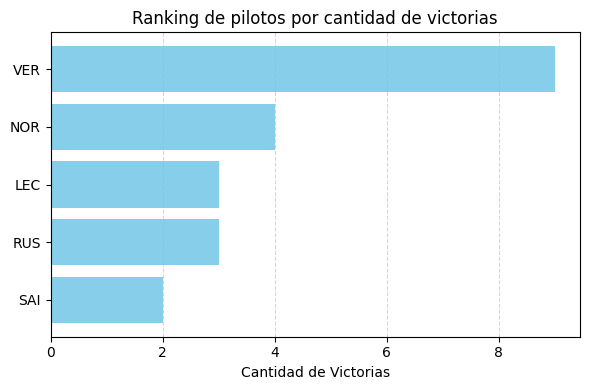

In [7]:
# Filtramos los ganadores
winners = result[result['Position_end'] == 1]

# Cuántas carreras ganó cada piloto
ranking = winners['Driver'].value_counts().reset_index()
ranking.columns = ['Driver', 'Wins']
ranking = ranking.sort_values(by='Wins', ascending=False)
ranking_top = ranking.head(5)

# Plot
plt.figure(figsize=(6, 4))
plt.barh(ranking_top['Driver'], ranking_top['Wins'], color='skyblue')
plt.xlabel('Cantidad de Victorias')
plt.title('Ranking de pilotos por cantidad de victorias')
plt.gca().invert_yaxis()  # Para que el primero quede arriba
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [8]:
top_drivers = ['VER','LEC', 'RUS']
df_top = result[result['Driver'].isin(top_drivers)]
df_top

,Driver,EventName,Position_start,Position_end,Total_LapTime,Tyre_Compound_start,Tyre_Compound_end,Total_PitTime,Pit_Stops,Pit_LapNumbers
157,LEC,Abu Dhabi Grand Prix,9.0,3.0,5225.219,MEDIUM,HARD,21.933,1,[20]
158,LEC,Australian Grand Prix,4.0,2.0,4829.209,MEDIUM,HARD,34.387,2,"[9, 34]"
159,LEC,Austrian Grand Prix,18.0,11.0,5129.854,MEDIUM,MEDIUM,96.589,4,"[1, 16, 33, 51]"
160,LEC,Azerbaijan Grand Prix,1.0,2.0,5588.917,MEDIUM,HARD,20.867,1,[16]
161,LEC,Bahrain Grand Prix,2.0,4.0,5544.411,SOFT,HARD,48.129,2,"[11, 34]"
...,...,...,...,...,...,...,...,...,...,...
436,VER,Saudi Arabian Grand Prix,1.0,1.0,4843.273,MEDIUM,HARD,20.668,1,[7]
437,VER,Singapore Grand Prix,2.0,2.0,6073.516,MEDIUM,HARD,29.681,1,[29]
438,VER,Spanish Grand Prix,2.0,1.0,5300.227,SOFT,SOFT,43.974,2,"[17, 44]"
439,VER,São Paulo Grand Prix,12.0,1.0,6201.830,INTERMEDIATE,INTERMEDIATE,1409.224,1,[32]


In [9]:
# Filtramos las carreras donde cada piloto ganó
ganadas = df_top[(df_top['Driver'].isin(top_drivers)) & (df_top['Position_end'] == 1)]

ganadas = ganadas.copy()
ganadas['RacingTime'] = ganadas['Total_LapTime'] - ganadas['Total_PitTime']
ganadas['PitFraction'] = ganadas['Total_PitTime'] / ganadas['Total_LapTime']
ganadas['Position_Change'] = ganadas['Position_start'] - ganadas['Position_end']
ganadas['Compound_Strategy'] = ganadas['Tyre_Compound_start'].astype(str) + ' → ' + ganadas['Tyre_Compound_end'].astype(str)

comparacion = ganadas.melt(
    id_vars=['Driver', 'EventName', 'Pit_Stops'],
    value_vars=['RacingTime', 'Total_PitTime'],
    var_name='Tipo',
    value_name='Tiempo'
)
ganadas['Driver'] = ganadas['Driver'].cat.remove_unused_categories()
comparacion['Driver'] = comparacion['Driver'].cat.remove_unused_categories()

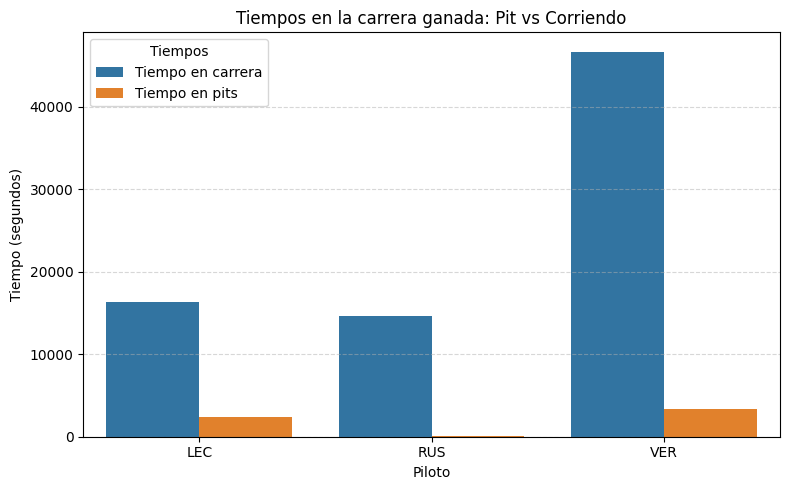

In [10]:
# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=comparacion, errorbar=None, estimator='sum', x='Driver', y='Tiempo', hue='Tipo')
plt.title('Tiempos en la carrera ganada: Pit vs Corriendo')
plt.ylabel('Tiempo (segundos)')
plt.xlabel('Piloto')
plt.legend(title='Tiempos', labels=['Tiempo en carrera', 'Tiempo en pits'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


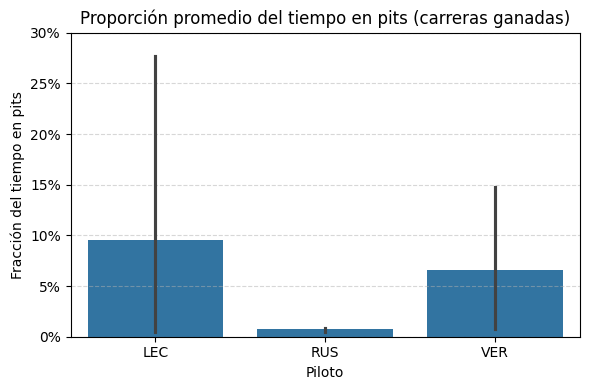

In [11]:
plt.figure(figsize=(6, 4))

sns.barplot(
    data=ganadas,
    x='Driver',
    y='PitFraction',
    estimator='mean'
)
plt.title('Proporción promedio del tiempo en pits (carreras ganadas)')
plt.ylabel('Fracción del tiempo en pits')
plt.xlabel('Piloto')
plt.ylim(0, 0.3)  # podés ajustar esto según valores reales
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


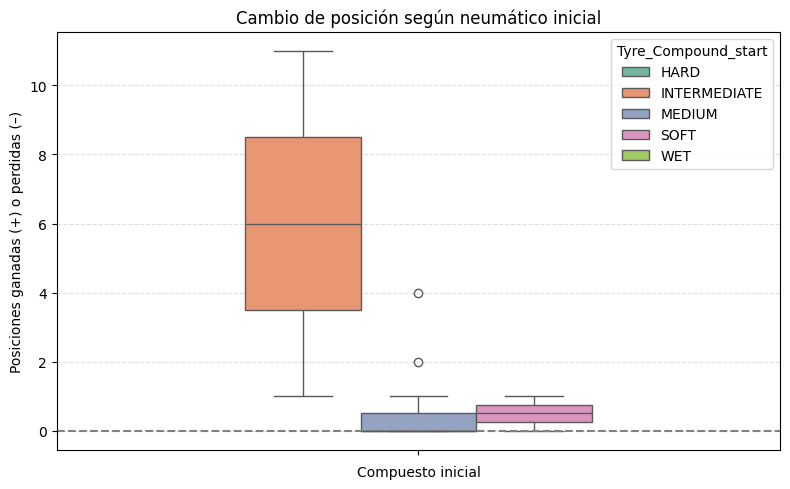

In [12]:
ganadas['Position_Change'] = ganadas['Position_start'] - ganadas['Position_end']

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=ganadas,
    hue='Tyre_Compound_start',
    y='Position_Change',
    palette='Set2'
)
plt.axhline(0, linestyle='--', color='gray')
plt.title('Cambio de posición según neumático inicial')
plt.ylabel('Posiciones ganadas (+) o perdidas (–)')
plt.xlabel('Compuesto inicial')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


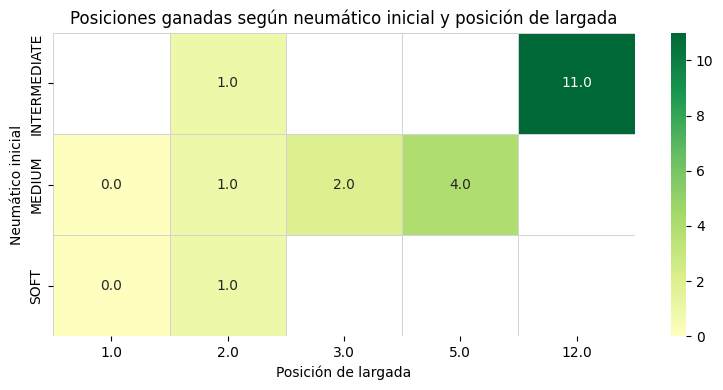

In [13]:
# Pivot con posición de largada
pivot = ganadas.pivot_table(
    index='Tyre_Compound_start',
    columns='Position_start',
    values='Position_Change',
    aggfunc='mean',
    observed=False
)

# Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="RdYlGn", center=0, linewidths=0.5, linecolor='lightgray')

plt.title("Posiciones ganadas según neumático inicial y posición de largada")
plt.xlabel("Posición de largada")
plt.ylabel("Neumático inicial")
plt.tight_layout()
plt.show()
